## Import the needed libraries

In [21]:
import PicSureHpdsLib
import pandas
import matplotlib
import json
from pprint import pprint
import sys
print(sys.path)
sys.path.append('/home/drew/Downloads/PIC-SURE/work')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

import PicSureHpdsLib
import PicSureClient
from utils import get_multiIndex_variablesDict, joining_variablesDict_onCol

['/home/drew/Downloads/PIC-SURE/PIC-SURE-2-Examples/Jupyter Notebook Examples/Python/HPDS', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/drew/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages/IPython/extensions', '/home/drew/.ipython', '/home/drew/Downloads/PIC-SURE/work']


In [25]:
cd ../

/home/drew/Downloads/PIC-SURE


## Create an instance of the datasource adapter and get a reference to the data resource 

In [26]:
PICSURE_network_URL = "https://3.236.133.248/picsure"
resource_id = "d39ae852-e22e-45d5-a7b2-6056ac54580f"
token_file = "token.txt"

with open(token_file, "r") as f:
    my_token = f.read()

client = PicSureClient.Client()
connection = client.connect(PICSURE_network_URL, my_token, True)
adapter = PicSureHpdsLib.Adapter(connection)
resource = adapter.useResource(resource_id)



+=========================================================================================+
|        [ WARNING ] you are specifying that you WANT to allow self-signed SSL            |
|        certificates to be acceptable for connections.  This may be useful for           |
|        working in a development environment or on systems that host public              |
|        data.  BEST SECURITY PRACTICES ARE THAT IF YOU ARE WORKING WITH SENSITIVE        |
|        DATA THEN ALL SSL CERTS BY THOSE EVIRONMENTS SHOULD NOT BE SELF-SIGNED.          |
+=========================================================================================+

+--------------------------------------+------------------------------------------------------
|  Resource UUID                       |  Resource Name                                  
+--------------------------------------+------------------------------------------------------
| d39ae852-e22e-45d5-a7b2-6056ac54580f
+---------------------------------

## Get a listing of all "demographics" entries in the data dictionary. Show what actions can be done with the "demographic_results" object

In [32]:
dictionary = resource.dictionary()
age_dictionary_search = dictionary.find("AGE").DataFrame()
demographic_entries = dictionary.find("demographic")
bp_dictionary_search = dictionary.find("blood pressure").DataFrame()
bmi_dictionary_search = dictionary.find("body mass index").DataFrame()
disease_dictionary_search = dictionary.find("disease").DataFrame()
disease_dictionary_search


,categorical,categoryValues,patientCount,observationCount,HpdsDataType,min,max
KEY,,,,,,,
\questionnaire\disease\any_cad\,True,"[No, Yes]",4891,4891,phenotypes,NaN,NaN
\questionnaire\disease\skin_cancer_self_report\,True,"[No, Yes]",4542,4542,phenotypes,NaN,NaN
\questionnaire\disease\stomach_cancer_self_report\,True,"[No, Yes]",4480,4480,phenotypes,NaN,NaN
\questionnaire\disease\brain_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\other_cancer_self_report\,True,"[No, Yes]",4494,4494,phenotypes,NaN,NaN
\questionnaire\disease\Any CAD (self report)\,True,"[No, Yes]",4859,4859,phenotypes,NaN,NaN
\questionnaire\disease\larynx_cancer_self_report\,True,"[No, Yes]",4481,4481,phenotypes,NaN,NaN
\questionnaire\disease\mouth_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\Any Diabetes (FBG >= 126 mg per dL or self-report)\,True,"[No, Yes]",9451,9451,phenotypes,NaN,NaN


## Examine the demographic_entries results by converting it into a pandas DataFrame

In [40]:
disease_dictionary_search

,categorical,categoryValues,patientCount,observationCount,HpdsDataType,min,max
KEY,,,,,,,
\questionnaire\disease\any_cad\,True,"[No, Yes]",4891,4891,phenotypes,NaN,NaN
\questionnaire\disease\skin_cancer_self_report\,True,"[No, Yes]",4542,4542,phenotypes,NaN,NaN
\questionnaire\disease\stomach_cancer_self_report\,True,"[No, Yes]",4480,4480,phenotypes,NaN,NaN
\questionnaire\disease\brain_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\other_cancer_self_report\,True,"[No, Yes]",4494,4494,phenotypes,NaN,NaN
\questionnaire\disease\Any CAD (self report)\,True,"[No, Yes]",4859,4859,phenotypes,NaN,NaN
\questionnaire\disease\larynx_cancer_self_report\,True,"[No, Yes]",4481,4481,phenotypes,NaN,NaN
\questionnaire\disease\mouth_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\Any Diabetes (FBG >= 126 mg per dL or self-report)\,True,"[No, Yes]",9451,9451,phenotypes,NaN,NaN


In [34]:
resource.query().help()


        .select()       list of data fields to return from resource for each record
        .crosscounts()  list of data fields that cross counts will be calculated for
        .require()      list of data fields that must be present in all returned records
        .anyof()        list of data fields that records must be a member of at least one entry
        .studies()      list of studies that are selected that the query will run against
        .filter()       list of data fields and conditions that returned records satisfy
                  [ Filter keys exert an AND relationship on returned records      ]
                  [ Categorical values have an OR relationship on their key        ]
                  [ Numerical Ranges are inclusive of their start and end points   ]

        .getCount()             single count indicating the number of matching records
        .getCrossCount()        array indicating number of matching records per cross-count keys
        .getResults()     

In [41]:
resource.query().filter().help()


            filter().
              add("key", value)                  - or -
              add("key", "value")               filter to records with KEY column that equals VALUE
              add("key", ["value1", "value2"])  filter to records with KEY column equalling one value within the given list
              add("key", start, end)            filter to records with KEY column value between START and END (inclusive)
                                                    start -or- end may be set to None to filter by a max or min value
              delete("key")                     delete a filter from the list of filters
              show()                            lists all current filters that results records must satisfy
              clear()                           clears all values from the filters list
            


In [53]:
query = resource.query()
query.filter().add("disease", ["Current asthma?"])
query_female = resource.query()
query_female.filter().add("disease", ["Ever asthma"])
query1 = resource.query()
query1.filter().add("\\disease\\", ["Current asthma?"])
query2 = resource.query()
query2.filter().add("\\disease\\", ["Ever asthma"])
field_age = resource.dictionary().find("\\AGE\\")

ERROR: cannot add, key does not exist in resource ->  disease
ERROR: cannot add, key does not exist in resource ->  disease


In [101]:
disease_entries = resource.dictionary().find("\\disease\\")
disease_entries.keys()
query = resource.query()
query.filter().add("\\disease\\", ["Current asthma?"])

ERROR: cannot add, key does not exist in resource ->  \disease\


In [103]:
query1 = resource.query()
query1.filter().add("disease")

field_ca = resource.dictionary().find("\\Current asthma?")
field_ea = resource.dictionary().find("\\Ever asthma?")
field_lc = resource.dictionary().find("\\lung_cancer_self_report")

query1.require().add(field_ca.keys())
query1.require().add(field_ea.keys())
query1.require().add(field_lc.keys())

query1.show()

ERROR: All Filter.add()'s must specify matching value, values, or range
.__________[ Query.select()  has NO SELECTIONS ]____________________________________________________________________________________________________________
.__________[ Query.crosscounts()  has NO SELECTIONS ]_______________________________________________________________________________________________________
.__________[ Query.require() Settings ]_________________________________________________________________________________________
| _key__________________________________________________________________________________________________________________________
|  \\questionnaire\\disease\\Current asthma?\\                                                                                      |
|  \\questionnaire\\disease\\Ever asthma?\\                                                                                         |
|  \\questionnaire\\disease\\lung_cancer_self_report\\                                  

In [106]:
field_bp = dictionary().find("\\blood pressure")
field_BMI = dictionary().find("\\Body Mass Index")

query_male.require().add(field_bp.keys())
query_male.require().add(field_BMI.keys())
query_female.require().add(field_bp.keys())
query_female.require().add(field_BMI.keys())

query_female.show()

TypeError: 'Dictionary' object is not callable

## Convert the query results for females into a DataFrame and plot it by BMI and Age

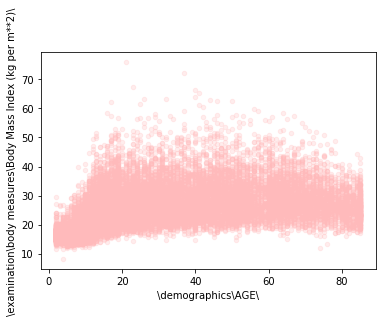

In [11]:
df_f = query_female.getResultsDataFrame()
plot_f = df_f.plot.scatter(x="\\demographics\\AGE\\", y="\\examination\\body measures\\Body Mass Index (kg per m**2)\\", c="#ffbabb40")

# ____ Uncomment if graphs are not displaying ____
#plot_f.plot()
#matplotlib.pyplot.show()

## Convert the query results for males into a DataFrame and plot it by BMI and Age

In [86]:
dictionary = resource.dictionary()
age_dictionary_search = dictionary.find("AGE")
bp_dictionary_search = dictionary.find("blood pressure").DataFrame()
bmi_dictionary_search = dictionary.find("body mass index").DataFrame()
bp_bmi_df = bp_dictionary_search.append(bmi_dictionary_search)
bp_bmi_df
#df_m = bp_bmi_df.getResultsDataFrame()
#plot_m = bp_bmi_df.plot.scatter(x="\\examination\\blood pressure\\60 sec HR (30 sec HR * 2)", y="\\examination\\body measures\\Body Mass Index (kg per m**2)\\", c="#5a7dd040")


,min,categorical,patientCount,observationCount,max,HpdsDataType
KEY,,,,,,
\examination\blood pressure\mean diastolic\,0.00000,False,6272,6272,122.66667,phenotypes
\examination\blood pressure\mean systolic\,76.66667,False,6272,6272,229.33333,phenotypes
\examination\blood pressure\60 sec HR (30 sec HR * 2)\,0.00000,False,1947,1947,184.00000,phenotypes
\examination\body measures\Body Mass Index (kg per m**2)\,11.98000,False,8491,8491,130.21000,phenotypes


In [89]:

d = resource.dictionary()
criteria = []
#criteria.extend(d.find("\\SEX\\").keys())
#criteria.extend(d.find("\\AGE\\").keys())
#criteria.extend(d.find("\\disease\\").keys())

criteria.extend(d.find("Body Mass Index").keys())
criteria.extend(d.find("BP").keys())
#criteria.extend(d.find("blood pressure").keys())
#bp_dictionary_search = dictionary.find("blood pressure").DataFrame()

query_unified = resource.query()
query_unified.require().add(criteria)
df_mf = query_unified.getResultsDataFrame()
df_mf

,Patient ID,\examination\body measures\Body Mass Index (kg per m**2)\,\examination\physical fitness\Recovery 1 diastolic BP (mm Hg)\,\examination\physical fitness\Recovery 1 systolic BP (mm Hg)\,\examination\physical fitness\Recovery 2 diastolic BP (mm Hg)\,\examination\physical fitness\Recovery 2 systolic BP (mm Hg)\,\examination\physical fitness\Stage 1 diastolic BP (mm Hg)\,\examination\physical fitness\Stage 1 systolic BP (mm Hg)\,\examination\physical fitness\Stage 2 diastolic BP (mm Hg)\,\examination\physical fitness\Stage 2 systolic BP (mm Hg)\,\questionnaire\disease\Any Hypertension? (BP >= 139 per 90 or self report)\
0,18,28.97,61.0,195.0,66.0,168.0,74.0,174.0,78.0,219.0,No
1,20,29.92,44.0,170.0,44.0,144.0,51.0,134.0,41.0,155.0,No
2,25,20.15,54.0,143.0,55.0,122.0,54.0,129.0,59.0,136.0,No
3,29,26.34,74.0,180.0,69.0,150.0,79.0,175.0,78.0,207.0,No
4,46,28.34,49.0,137.0,58.0,128.0,63.0,126.0,68.0,151.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1088,9966,30.12,94.0,184.0,96.0,164.0,85.0,148.0,90.0,182.0,No
1089,9968,30.17,60.0,136.0,69.0,129.0,52.0,127.0,64.0,149.0,No
1090,9978,34.23,66.0,155.0,66.0,157.0,66.0,157.0,82.0,172.0,No
1091,9988,18.23,73.0,175.0,83.0,169.0,76.0,159.0,73.0,163.0,Yes


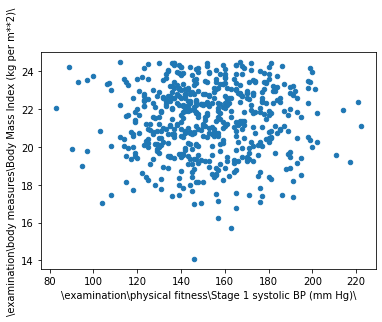

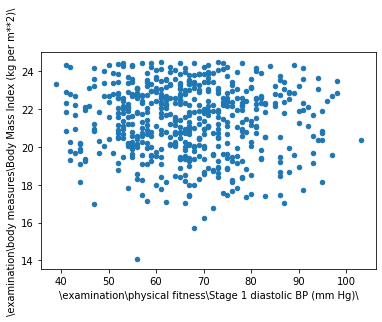

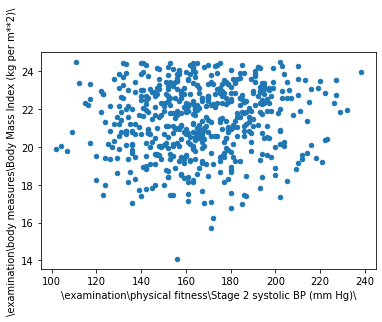

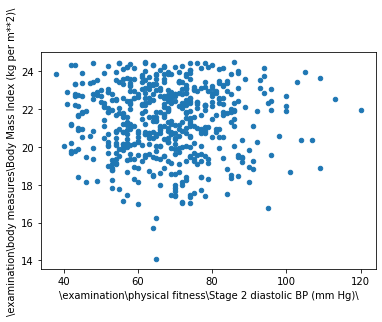

In [90]:
q1 = df_mf["\\examination\\body measures\\Body Mass Index (kg per m**2)\\"].quantile(0.50)

test = df_mf.mask(df_mf["\\examination\\body measures\\Body Mass Index (kg per m**2)\\"] > q1)

plot_mf = test.plot.scatter(x="\\examination\\physical fitness\\Stage 1 systolic BP (mm Hg)\\", y="\\examination\\body measures\\Body Mass Index (kg per m**2)\\")
plot_mf = test.plot.scatter(x="\\examination\\physical fitness\\Stage 1 diastolic BP (mm Hg)\\", y="\\examination\\body measures\\Body Mass Index (kg per m**2)\\")
plot_mf = test.plot.scatter(x="\\examination\\physical fitness\\Stage 2 systolic BP (mm Hg)\\", y="\\examination\\body measures\\Body Mass Index (kg per m**2)\\")
plot_mf = test.plot.scatter(x="\\examination\\physical fitness\\Stage 2 diastolic BP (mm Hg)\\", y="\\examination\\body measures\\Body Mass Index (kg per m**2)\\")

# plot data
#plot_mf = test.plot.scatter(x="\\demographics\\AGE\\", y="\\examination\\body measures\\Body Mass Index (kg per m**2)\\")

# ____ Uncomment if graphs are not displaying ____
plot_mf.plot()
matplotlib.pyplot.show()

## Replot data but trim outliers

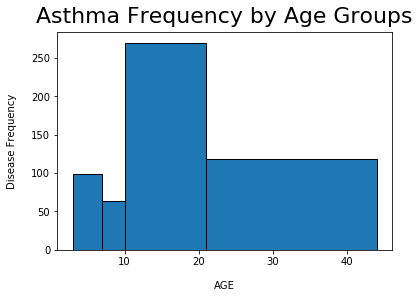

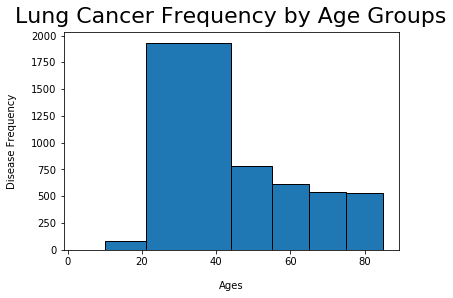

In [189]:
import matplotlib.pyplot as plt

d = resource.dictionary()
criteria = []
criteria.extend(d.find("\\AGE\\").keys())
#criteria.extend(d.find("\\disease\\").keys())

criteria.extend(d.find("lung").keys())
#criteria.extend(d.find("blood pressure").keys())
#bp_dictionary_search = dictionary.find("blood pressure").DataFrame()

query_unified = resource.query()
query_unified.require().add(criteria)
df_mf = query_unified.getResultsDataFrame()
df_mf.columns=['patient_id','AGE','lung_cancer_self_report']
df_mf
lung_dfm = df_mf[df_mf.lung_cancer_self_report == 'Yes']
lung_dfm.shape, lung_dfm
plt.hist(df_mf['AGE'], bins=[3,7,10,21,44,55,65,75,85],edgecolor='black')

plt.xlabel("Ages", labelpad=14)
plt.ylabel("Disease Frequency", labelpad=14)
plt.title("Lung Cancer Frequency by Age Groups", y=1.015, fontsize=22);


In [ ]:

dfmf_age_groupA = dfmf[(dfmf.AGE >= 0) & (dfmf.AGE <= 3)]
dfmf_age_groupB = dfmf[(dfmf.AGE >= 4) & (dfmf.AGE <= 7)]
dfmf_age_groupC = dfmf[(dfmf.AGE >= 8) & (dfmf.AGE <= 10)]
dfmf_age_groupD = dfmf[(dfmf.AGE >= 11) & (dfmf.AGE <= 20)]
dfmf_age_groupE = dfmf[(dfmf.AGE >= 21) & (dfmf.AGE <= 44)]

kwargs = dict(histtype='stepfilled',normed=False, bins=5)
plt.hist(dfmf_age_groupA, **kwargs)
plt.hist(dfmf_age_groupB, **kwargs)
plt.hist(dfmf_age_groupC, **kwargs)
plt.hist(dfmf_age_groupD, **kwargs)
plt.hist(dfmf_age_groupE, **kwargs)
plt.hist(df_mf, bins=5, normed=False, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

TypeError: '<=' not supported between instances of 'int' and 'str'

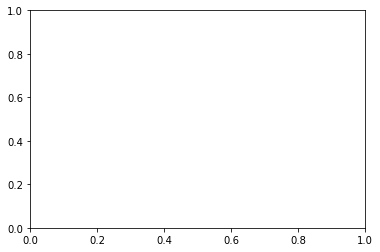

In [169]:
dfmf_age_groupA = dfmf[(dfmf.AGE >= 0) & (dfmf.AGE <= 3)]
dfmf_age_groupB = dfmf[(dfmf.AGE >= 4) & (dfmf.AGE <= 7)]
dfmf_age_groupC = dfmf[(dfmf.AGE >= 8) & (dfmf.AGE <= 10)]
dfmf_age_groupD = dfmf[(dfmf.AGE >= 11) & (dfmf.AGE <= 20)]
dfmf_age_groupE = dfmf[(dfmf.AGE >= 21) & (dfmf.AGE <= 44)]
dfmf_age_groupA,
plot_mf = plt.hist(df_mf)
plot_mf.plot()
matplotlib.pyplot.show()

((10, 3),
       patient_id   AGE lung_cancer_self_report
 349          805  76.0                     Yes
 377          859  72.0                     Yes
 393          889  56.0                     Yes
 562         1283  65.0                     Yes
 911         2080  63.0                     Yes
 1417        3195  74.0                     Yes
 1826        4106  85.0                     Yes
 2229        4993  83.0                     Yes
 4029        8993  74.0                     Yes
 4366        9746  76.0                     Yes)

In [96]:
test = df_mf.mask(df_mf["\\questionnaire\\disease\\Current asthma?\\"] = 'Yes')
test


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-96-a449ef4b4282>, line 1)

In [ ]:
d = resource.dictionary()
criteria = []
criteria.extend(d.find("\\AGE\\").keys())
#criteria.extend(d.find("\\disease\\").keys())

criteria.extend(d.find("lung").keys())
#criteria.extend(d.find("blood pressure").keys())
#bp_dictionary_search = dictionary.find("blood pressure").DataFrame()

query_unified = resource.query()
query_unified.require().add(criteria)
df_mf = query_unified.getResultsDataFrame()
df_mf.columns=['patient_id','AGE','Current_Asthma','Ever_Asthma']
df_mf
dfmf = df_mf[(df_mf.Current_Asthma == 'Yes')]
dfmf